In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

18

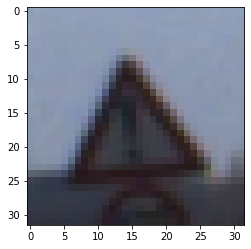

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]                                 ## Checking the data

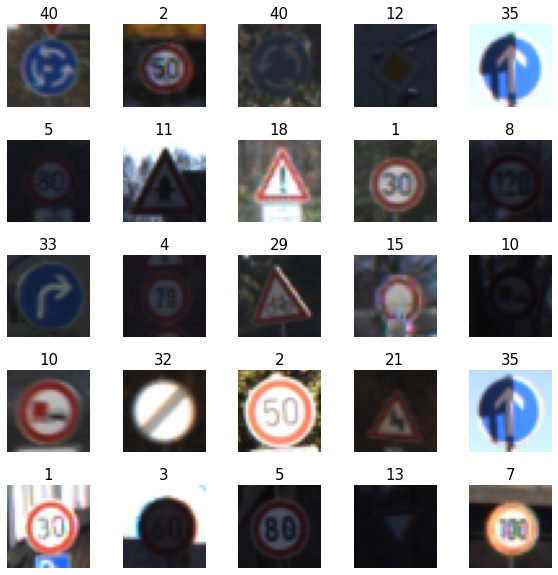

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

        

# Now conversion of images to grayscale starts.

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)  ##Just shuffling 

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
X_train_gray_norm = (X_train_gray -128)/128  ##Normalising data
X_test_gray_norm = (X_test_gray -128)/128
X_valid_gray_norm = (X_valid_gray -128)/128

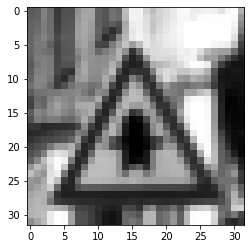

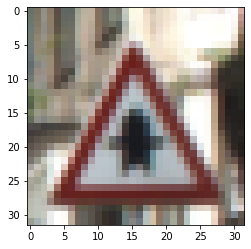

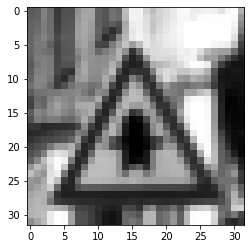

In [12]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# Building deep convolutional neural network model

In [17]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

# Compile and train CNN model

In [18]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = CNN.fit(X_train_gray_norm, y_train, batch_size = 500, epochs = 5, verbose = 1, validation_data = (X_valid_gray_norm, y_valid))
# Increase the 'epochs' value above to increase the training cycle and you'll have much higher accuracy!!

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 15s 421us/sample - loss: 3.1526 - accuracy: 0.1802 - val_loss: 2.6183 - val_accuracy: 0.3392
Epoch 2/5
34799/34799 [==============================] - 13s 362us/sample - loss: 1.7923 - accuracy: 0.4987 - val_loss: 1.4480 - val_accuracy: 0.5864
Epoch 3/5
34799/34799 [==============================] - 12s 351us/sample - loss: 1.0951 - accuracy: 0.6789 - val_loss: 0.9839 - val_accuracy: 0.7032
Epoch 4/5
34799/34799 [==============================] - 12s 356us/sample - loss: 0.7940 - accuracy: 0.7691 - val_loss: 0.8329 - val_accuracy: 0.7658
Epoch 5/5
34799/34799 [==============================] - 13s 370us/sample - loss: 0.6323 - accuracy: 0.8190 - val_loss: 0.6764 - val_accuracy: 0.8091


# Asses the model's performance!!

# Remember confusion matrix??? We'll use that concept to assess the performance :)

In [22]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

Text(0.5, 1.0, 'Training and Validation Loss')

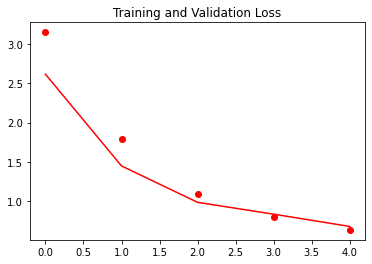

In [29]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title("Training and Validation Loss")


Text(0.5, 1.0, 'Training and Validation Accuracy')

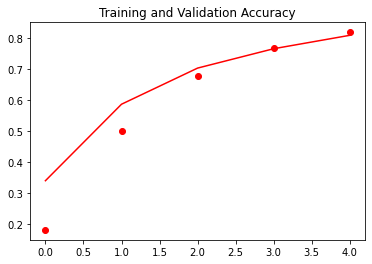

In [26]:
plt.plot(epochs, accuracy, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Accuracy')
plt.title("Training and Validation Accuracy")

<AxesSubplot:>

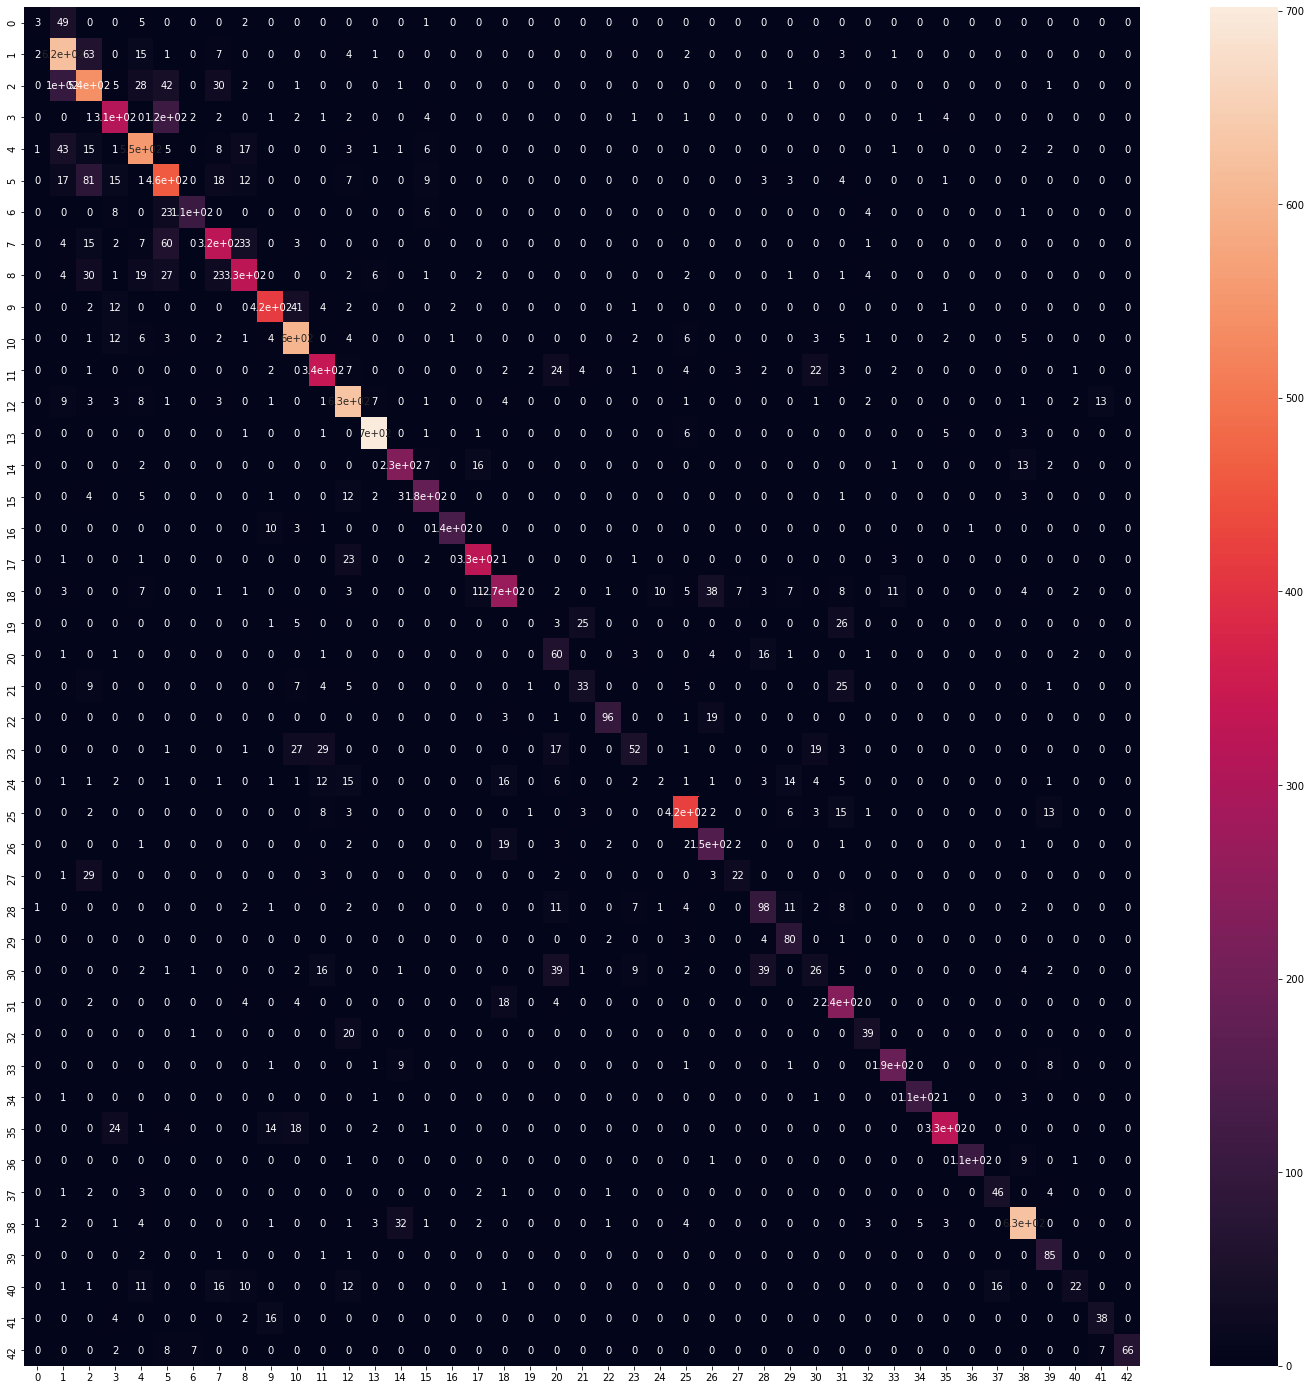

In [30]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

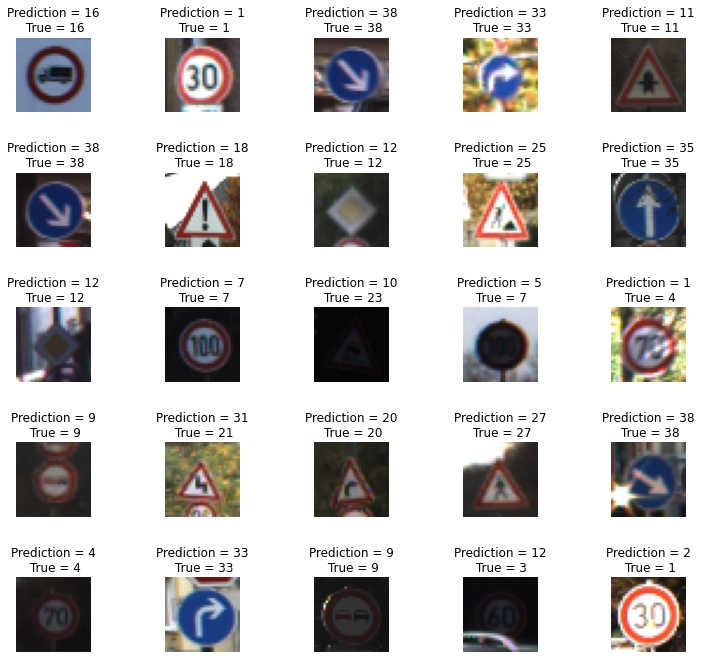

In [31]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    